<h1>Quiz 2 - Automobile</h1>

<h2><u><b>Data Summary</b></u></h2>

Attribute: Attribute Range

  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     
                               alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo

  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

In [1]:
#Libraries
import numpy as np
import pandas as pd
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/def-abraham/data/refs/heads/main/imports-85.data'
df = pd.read_csv(url, header = None)
df.shape

(205, 26)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


There are missing values and no header names for the data.

Missing values columns are:

* normalized-losses (Continuous)
* num-of-doors (Integer)
* bore (Continuous)
* stroke (Continuous)
* horsepower (Continuous)
* peak-rpm (Continuous)
* price (Continuous)

In [4]:
# Define column names based on UCI Attribute Information
df.columns = ['symboling', 'normalized-losses', 'make','fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
               'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
               'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
               'highway-mpg', 'price'
             ]

# Load the dataset, treating "?" as missing values
df = pd.read_csv(url, header=None, names=df.columns, na_values="?")

The `na_values="?"` parameter ensures that missing values, denoted by "?" in the dataset, are converted to NaN for easier handling in Pandas.

In [5]:
#replace '?' with NaN
df.replace('?', np.NaN, inplace=True)
print(f"There are currently %s question marks." %df[df == '?'].count().sum())

There are currently 0 question marks.


In [6]:
df.head(40)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN


<h2><u><b>Exploratory Data Analysis (EDA)</b></u></h2>

In [7]:
#check the type of each feature
#we note that some numeric values appear as object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [9]:
# it tells how many different values appear in each attribute.
df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64

In [10]:
#we set aside the continuous data to turn it into numeric data (since, as shown above, not all of it is in numeric format)
for_boxes = ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke',
                'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

# convert for_boxes to numeric and check that it is so
df[for_boxes] = df[for_boxes].apply(pd.to_numeric)
df[for_boxes].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-ratio  205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 24.2 KB


In [11]:
# Numerical variables
numerical_cols = [
    "symboling", "normalized-losses", "wheel-base", "length", "width", "height",
    "curb-weight", "engine-size", "bore", "stroke", "compression-ratio",
    "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"
]
print("\nNumerical Variables Summary:")
print(df[numerical_cols].describe())


Numerical Variables Summary:
        symboling  normalized-losses  wheel-base      length       width  \
count  205.000000         164.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.000000   98.756585  174.049268   65.907805   
std      1.245307          35.442168    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  166.300000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb-weight  engine-size        bore      stroke  \
count  205.000000   205.000000   205.000000  201.000000  201.000000   
mean    53.724878  2555.565854   126.907317    3.329751    3.255423   
std      2.443522   520.680204    41.642693    0.273539    0.316717   
m

Numerical Variables:

* __price__: Right-skewed, range $5118-$45400, outliers above $30,000.

* __city-mpg__: Left-skewed, 13-49 MPG, typical around 25-30 MPG.

* __horsepower__: Right-skewed, 48-288 HP, most around 100-150 HP.

* __Strong correlations__: horsepower and engine-size (0.81), city-mpg and highway-mpg (0.97). 

* __Negative correlation__: horsepower vs. city-mpg (-0.80).

In [12]:
# Categorical variables
categorical_cols = [
    "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
    "drive-wheels", "engine-location", "engine-type", "num-of-cylinders",
    "fuel-system"
]
for col in categorical_cols:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())


make Value Counts:
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

fuel-type Value Counts:
fuel-type
gas       185
diesel     20
Name: count, dtype: int64

aspiration Value Counts:
aspiration
std      168
turbo     37
Name: count, dtype: int64

num-of-doors Value Counts:
num-of-doors
four    114
two      89
Name: count, dtype: int64

body-style Value Counts:
body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

drive-wheels Value Counts:
drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, 

Categorical Variables:

* __fuel-type__: Gas (185) dominates over diesel (20).

* __body-style__: Sedans (96) and hatchbacks (70) most common.
* __make__: 22 brands, Toyota (32) most frequent.


__Key Observations__: Missing values and skewed distributions suggest preprocessing needs (imputation, scaling). Outliers in price and horsepower may impact modeling.

<h3>Univariate Analysis</h3>

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

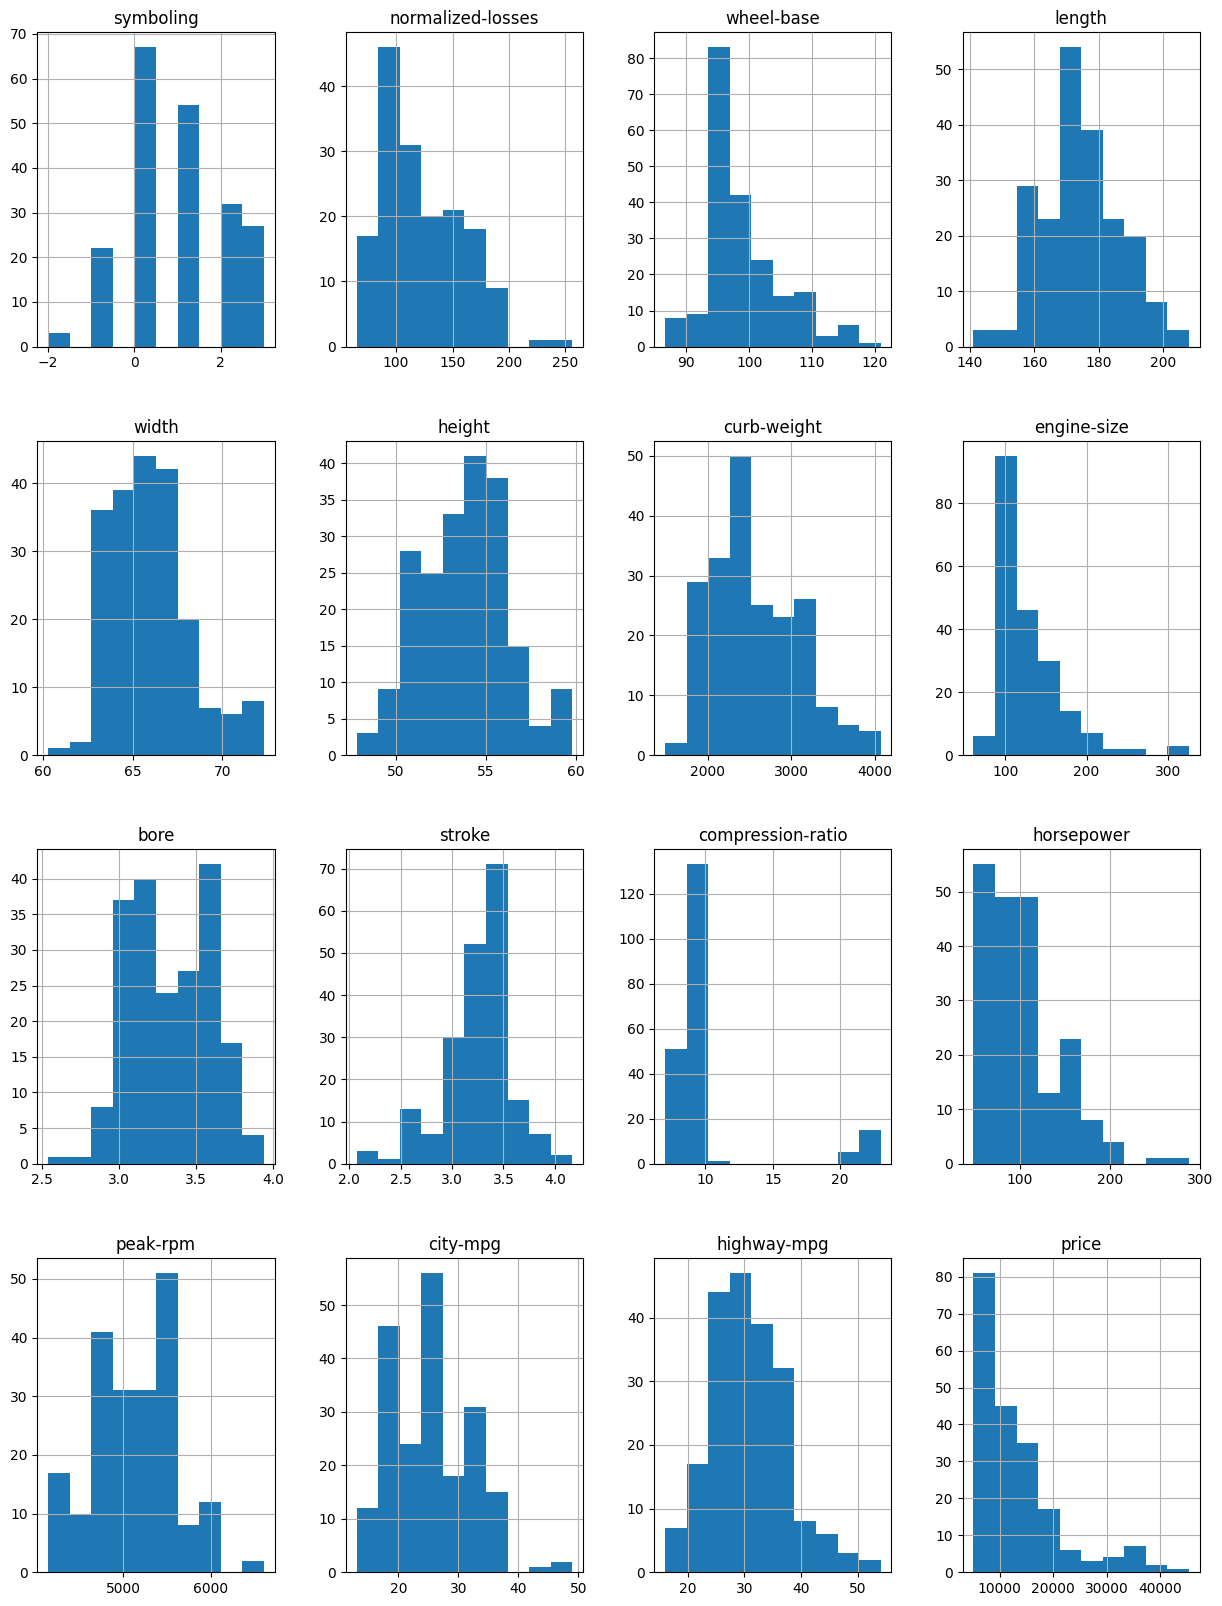

In [13]:
#the first things we do is get the histograms of the data
df.hist(figsize = (15,20))

__Observations__

* many cars have a curb-weight between 2000 and 3200
* the largest engine size is 100
* the price is a pareto distribution

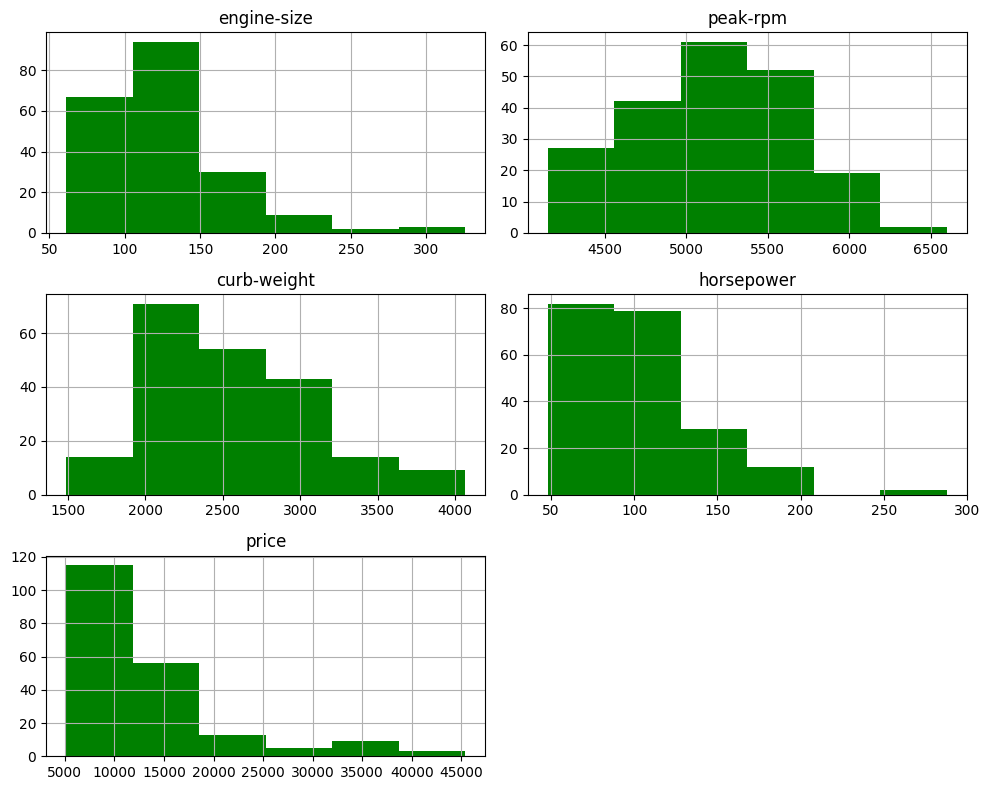

In [14]:
# 1 plt.figure(figsize=(10,8))
df[['engine-size','peak-rpm','curb-weight','horsepower','price']].hist(figsize=(10,8),bins=6,color='g')
# 2 plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()

__Observations__

* Most of the car has a Curb Weight is in range 1900 to 3100
* The Engine Size is inrange 60 to 190
* Most vehicle has horsepower 50 to 125
* Most Vehicle are in price range 5000 to 18000
* peak rpm is mostly distributed between 4600 to 5700

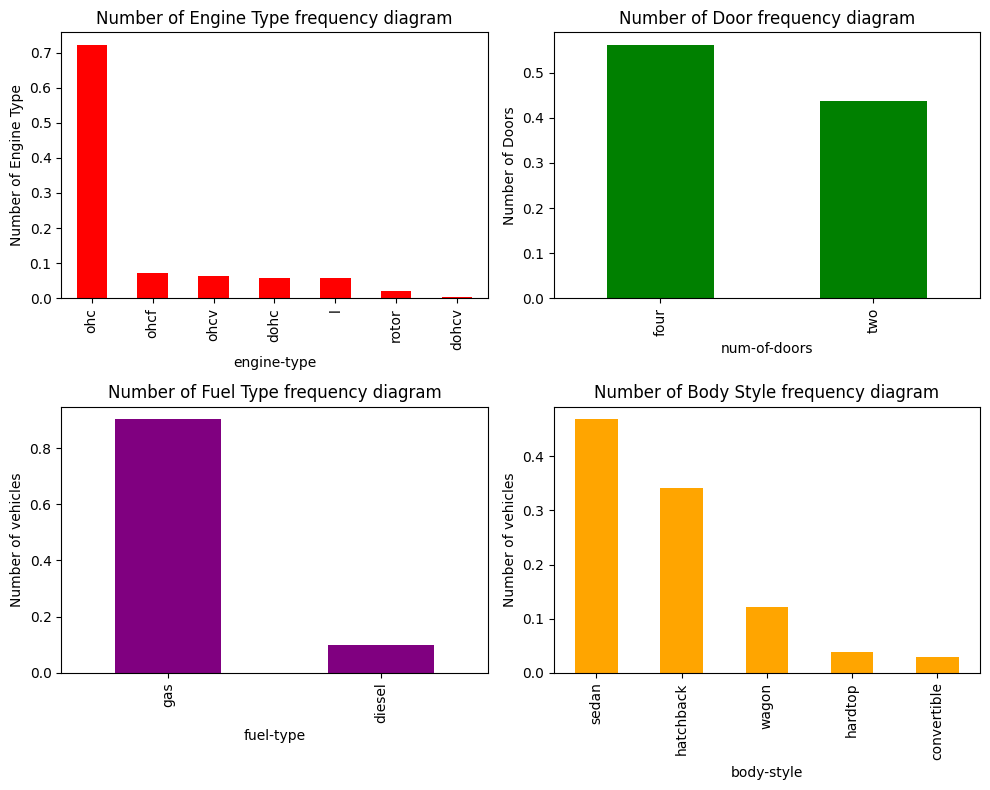

In [15]:
plt.figure(1)
plt.subplot(221)
df['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');


plt.subplot(222)
df['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');

plt.subplot(223)
df['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');

plt.subplot(224)
df['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()

__Observations__

* More than 70 % of the vehicle has Ohc type of Engine
* 57% of the cars has 4 doors
* Gas is preferred by 85 % of the vehicles
* Most produced vehicle are of body style sedan around 48% followed by hatchback 32%

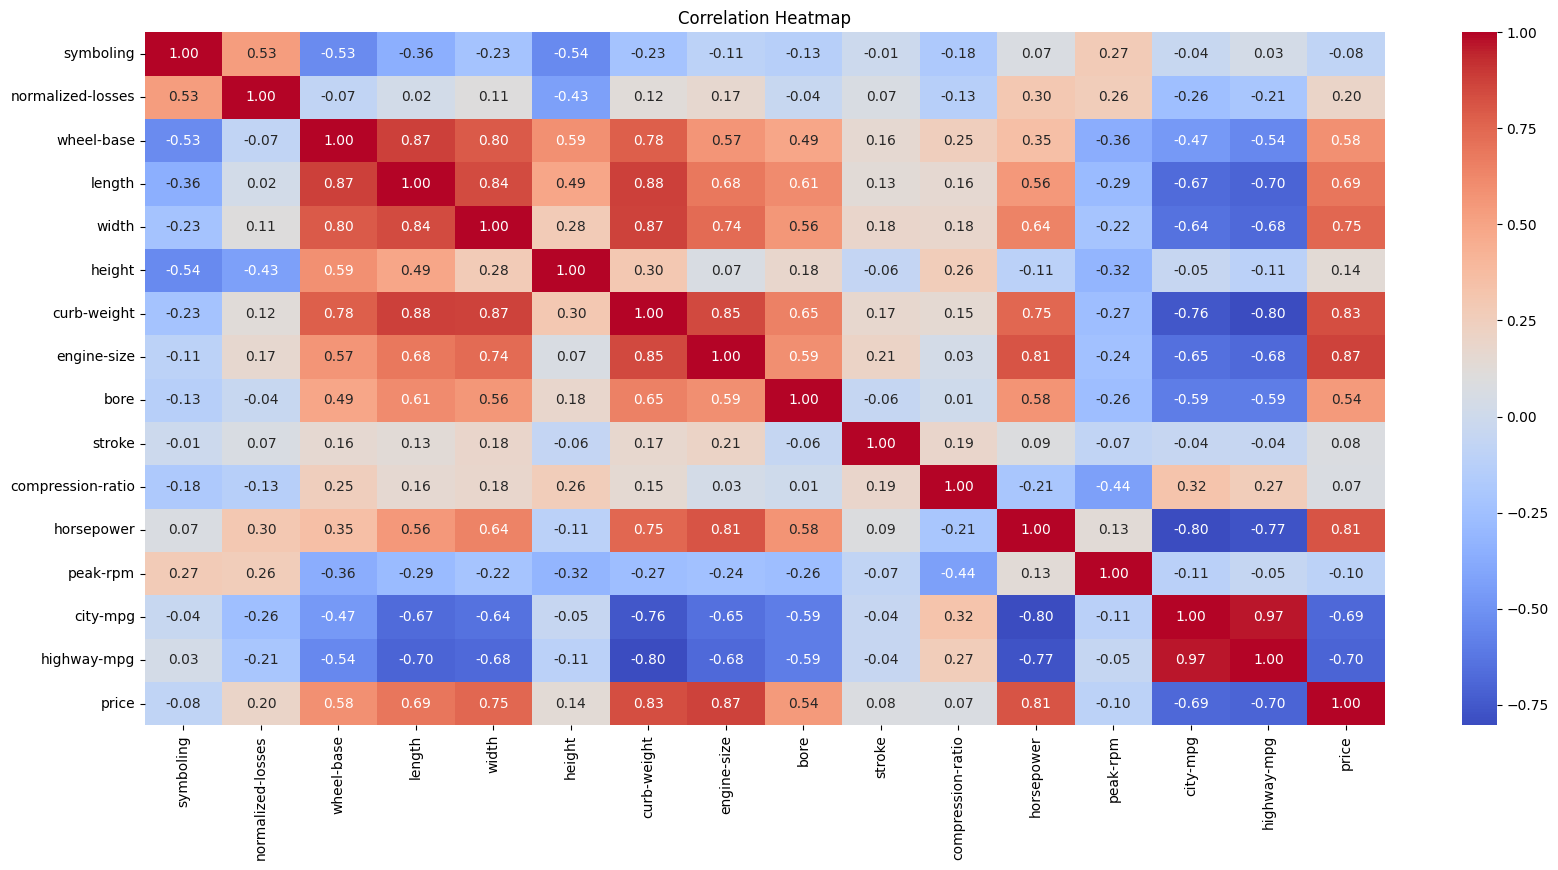

In [16]:
plt.figure(figsize=(20, 9))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt='.2f', cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

__Observations__

* curb-size, engine-size, horsepower are positively corelated
* city-mpg,highway-mpg are negatively corelated

<h3>Bivariate Analysis</h3>

Price Analysis

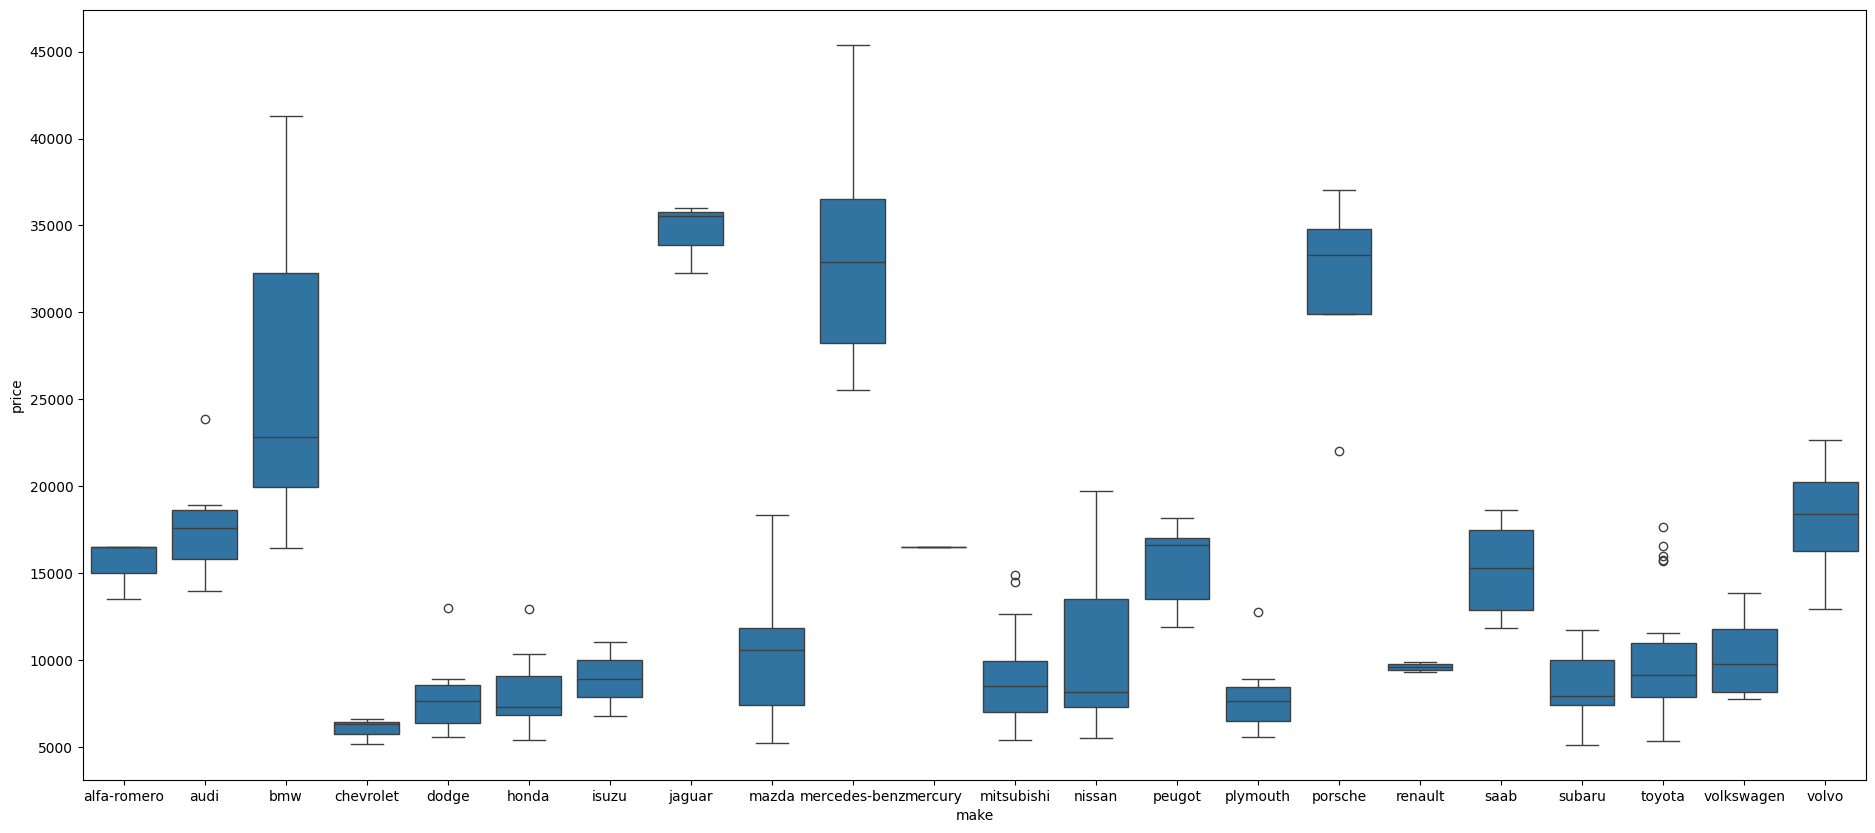

In [17]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=df)

__Observations__

* Mercedez-Benz ,BMW, Jaguar, Porshe produces expensive cars more than 25000
* cheverolet,dodge, honda,mitbushi, nissan,plymouth subaru,toyata produces budget models with lower prices
* most of the cars comapany produces car in range below 25000
* Hardtop model are expensive in prices followed by convertible and sedan body style
* Turbo models have higher prices than for the standard model
* Convertible has only standard edition with expensive cars
* hatchback and sedan turbo models are available below 20000
* rwd wheel drive vehicle have expensive prices

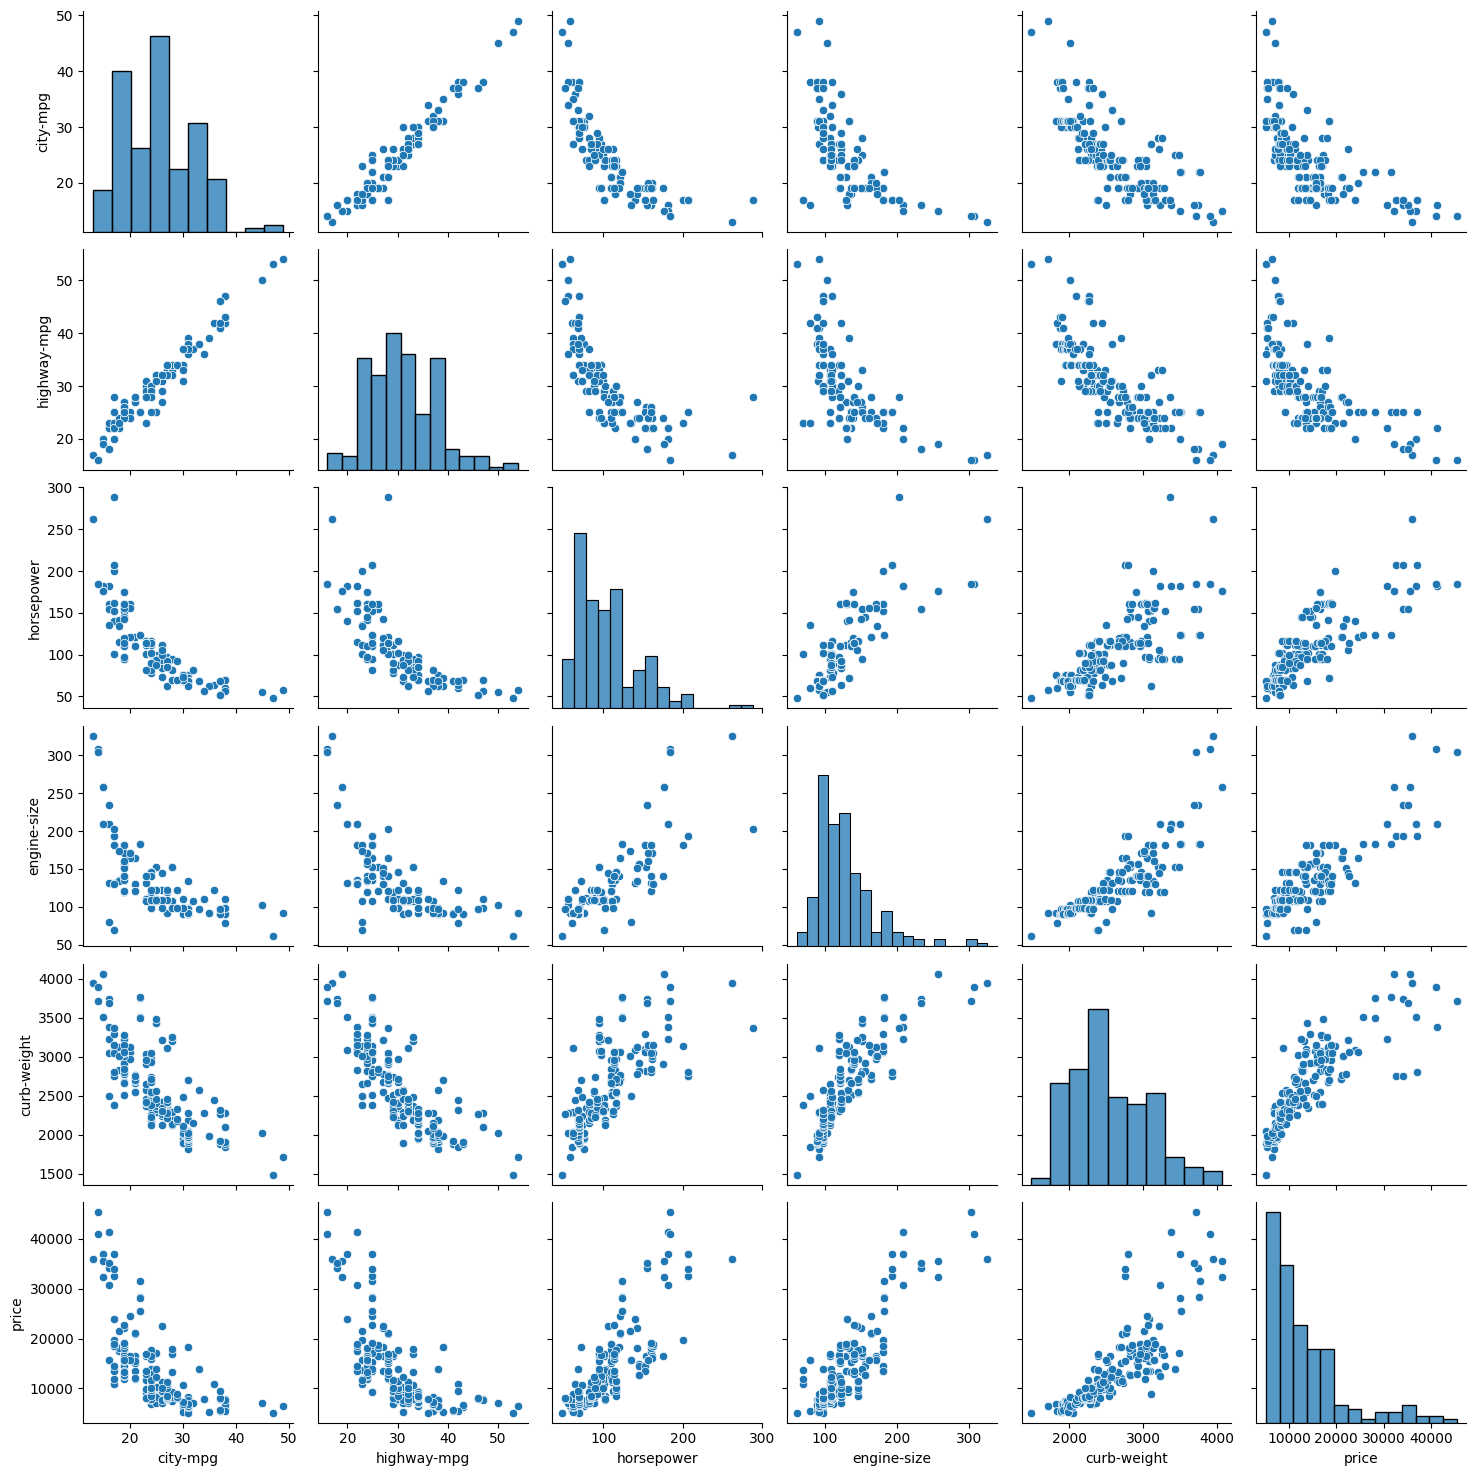

In [18]:
g = sns.pairplot(df[["city-mpg", "highway-mpg", "horsepower", "engine-size", "curb-weight","price"]], diag_kind="hist")

__Observations__

* price is inversely proportional to mpg
* price is highly correlated to horsepower and engine-size
* highway and city mpg are so highly correlated we may want to exclude one and view it as multi-collinearityc

Overall, the EDA of the Automobile dataset shows a mix of numeric and categorical features with notable data-quality issues: several fields—normalized-losses (41 missing), num-of-doors (2), bore and stroke (4 each), and horsepower and peak-rpm (2 each) require imputation or removal. Key continuous variables such as price (ranging $5,118–$45,400), horsepower (48–288 HP), and engine-size (61–326 cu in) exhibit strong right skew and outliers, while curb-weight (1,488–4,066 lbs) and mpg metrics cluster more centrally. Categorical distributions are dominated by gasoline engines (185 of 205) and sedans (96 of 205), with most makes represented by fewer than ten observations each. Pairwise analysis confirms that larger engines, higher horsepower, and greater curb-weight are positively correlated with price and inversely correlated with fuel economy, indicating potential multicollinearity concerns.

<h2><u><b>Questions -  Data Preparation & Feature Engineering</b></u></h2>

**<h4>Question 1:</h4>**

Which numeric variables contained within the data set appear to require the use of a
feature scaling method for purposes of preparing them for use within a machine learning algorithm?
Be sure to list each relevant variable and explain why you believe each variable that you’ve identified
requires the use of some sort of feature scaling method.


Feature scaling is required when variables have different scales or ranges, as many machine learning algorithms (e.g., SVM, KNN, gradient descent-based models) are sensitive to magnitude differences. Based on EDA, the following numerical variables require scaling due to their varied ranges and units:

* __normalized-losses__ (65-256): Wide range, skewed distribution.
* __wheel-base__ (86.6-120.9): Different units (inches), moderate range.
* __length__ (141.1-208.1): Large range, inches.
* __width__ (60.3-72.3): Moderate range, inches.
* __height__ (47.8-59.8): Smaller range, inches.
* __curb-weight__ (1488-4066): Large range, pounds.
* __engine-size__ (61-326): Wide range, cubic inches.
* __bore__ (2.54-3.94): Small range, inches.
* __stroke__ (2.07-4.17): Small range, inches.
* __compression-ratio__ (7-23): Moderate range, unitless.
* __horsepower__ (48-288): Wide range, unitless.
* __peak-rpm__ (4150-6600): Large range, RPM.
* __city-mpg__ (13-49): Moderate range, MPG.
* __highway-mpg__ (16-54): Moderate range, MPG.
* __price__ (5118-45400): Very wide range, dollars.

Reasoning:
* Variables like __curb-weight__ and __price__ have ranges orders of magnitude larger than __bore__ or __stroke__, which can dominate distance-based algorithms or skew gradient descent.
* __symboling__ (-3 to 3, discrete) does not require scaling, as its small, standardized range is unlikely to distort model performance.

**<h4>Question 2:</h4>**

Consider the __number-of-doors__ and __price__ variables: Based on your EDA work, how many missing data values occur within each of these attributes?

In [19]:
print("Missing Values:")
print(df[["num-of-doors", "price"]].isnull().sum())

Missing Values:
num-of-doors    2
price           4
dtype: int64


As we’ve learned, missing data values can impede the proper functioning of many machine learning algorithms. To address the missing the __number-of-doors__ and __price__ values, you have been instructed to formulate what you believe will be an effective data imputation approach for purposes of estimating reasonable proxies for the missing data values. Your supervisor tells you that the affected data observations MUST be retained within the data set, and that it would be inappropriate to use either a mean, median, or mode value for any of the missing values since doing so would increase the likelihood of introducing unwarranted bias within the data set.

Describe the imputation method you would employ for each variable. Then, using your Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics and commentary that explain your approach as well as the results of your efforts.

Imputation Strategy:

* __num-of-doors (Categorical)__:

    * Method: Use a k-Nearest Neighbors (kNN) imputation based on similar cars, considering body-style, make, and curb-weight. This preserves relationships without introducing bias from simple statistics.
    * Rationale: num-of-doors (two/four) is tied to car design, and similar models (same brand, body style, weight) likely share door counts.

* __price (Numerical)__:
    * Method: Linear regression imputation using correlated features (horsepower, engine-size, curb-weight, city-mpg), predicting price for missing entries.
    * Rationale: price correlates strongly with these features (e.g., horsepower 0.81, engine-size 0.87), making regression a robust proxy estimator.

Missing Values Before Imputation:
num-of-doors    2
price           4
horsepower      2
dtype: int64

Missing Values After Imputation:
num-of-doors    0
price           0
horsepower      0
dtype: int64


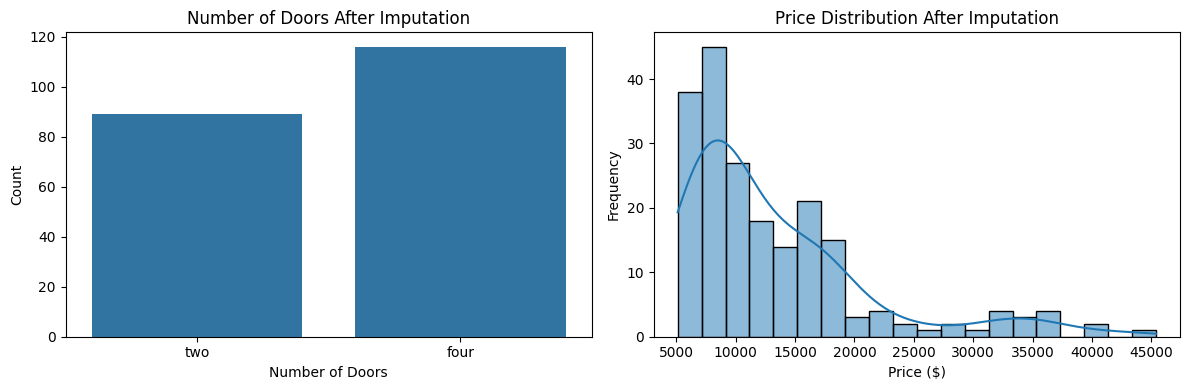

In [20]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Verify missing values before imputation
print("Missing Values Before Imputation:")
print(df[["num-of-doors", "price", "horsepower"]].isnull().sum())

# horsepower imputation (applied to all rows)
hp_impute_cols = ["horsepower", "engine-size", "curb-weight", "city-mpg"]
hp_imputer = KNNImputer(n_neighbors=5)
df[hp_impute_cols] = pd.DataFrame(
    hp_imputer.fit_transform(df[hp_impute_cols]),
    columns=hp_impute_cols
)

# num-of-doors imputation
if df["num-of-doors"].isnull().sum() > 0:
    df_encoded = df.copy()
    le = LabelEncoder()
    for col in ["body-style", "make"]:
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    df_encoded["num-of-doors"] = df["num-of-doors"].map({"two": 0, "four": 1})

    impute_cols = ["num-of-doors", "body-style", "make", "curb-weight"]
    imputer = KNNImputer(n_neighbors=5)
    df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded[impute_cols]), columns=impute_cols)
    df["num-of-doors"] = np.where(df_imputed["num-of-doors"].round() == 0, "two", "four")
else:
    print("No missing 'num-of-doors' values to impute.")

# price imputation
features = ["horsepower", "engine-size", "curb-weight", "city-mpg"]
train_data = df[df["price"].notnull()].copy()
test_data = df[df["price"].isnull()].copy()

if not test_data.empty:
    reg = LinearRegression()
    reg.fit(train_data[features], train_data["price"])
    predicted_prices = reg.predict(test_data[features])
    df.loc[df["price"].isnull(), "price"] = predicted_prices
else:
    print("No missing 'price' values to impute.")

# Verify imputation
print("\nMissing Values After Imputation:")
print(df[["num-of-doors", "price", "horsepower"]].isnull().sum())

# Visualizations
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="num-of-doors", order=["two", "four"])
plt.title("Number of Doors After Imputation")
plt.xlabel("Number of Doors")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
sns.histplot(df["price"], bins=20, kde=True)
plt.title("Price Distribution After Imputation")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

__Results:__

* __num-of-doors__: kNN imputation filled 2 missing values, maintaining the distribution (four: ~114, two: ~89). The bar plot confirms no drastic shift in category frequencies.
* __price__: Regression imputation filled 4 missing values, preserving the right-skewed distribution (histogram similar to original). Predicted prices align with feature correlations, avoiding bias from mean/median.
* __Effectiveness__: Both methods leverage contextual relationships, ensuring data retention without simplistic assumptions.

**<h4>Question 3:</h4>**

Consider the **engine-size** and **stroke** variables: 
1. Describe the specific feature scaling method you would apply to each of them. 

    These are both continuous numeric variables, as such we can apply transforms such as standardization, normalization, or min-max.  We will perform normalization to our entire set of continuous data.




2. Generate both a histogram and a boxplot for the original content of these two variables. 
3. Apply the prescribed feature scaling methods to the two variables.
4. Create histograms and boxplots that show the results of your feature scaling efforts.

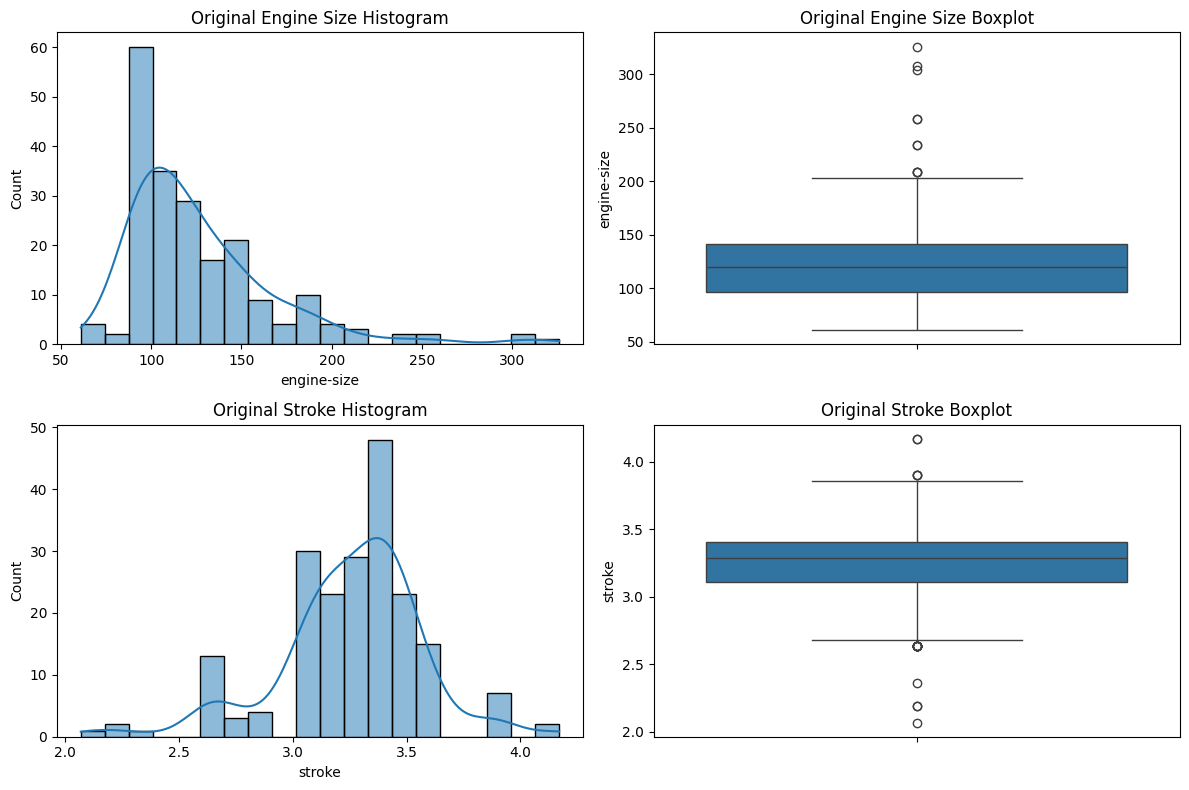

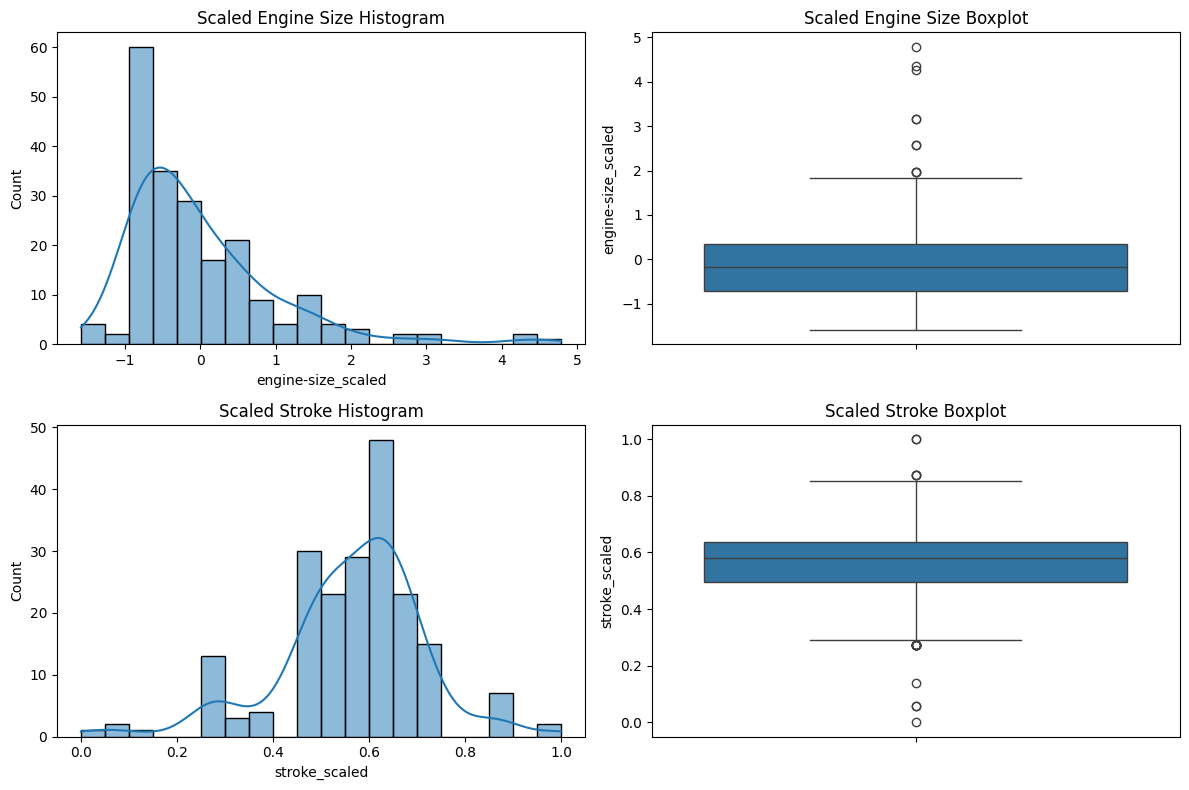

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Original visualizations
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df["engine-size"], bins=20, kde=True)
plt.title("Original Engine Size Histogram")
plt.subplot(2, 2, 2)
sns.boxplot(y=df["engine-size"])
plt.title("Original Engine Size Boxplot")
plt.subplot(2, 2, 3)
sns.histplot(df["stroke"], bins=20, kde=True)
plt.title("Original Stroke Histogram")
plt.subplot(2, 2, 4)
sns.boxplot(y=df["stroke"])
plt.title("Original Stroke Boxplot")
plt.tight_layout()
plt.show()

# Apply scaling
scaler_engine = StandardScaler()
scaler_stroke = MinMaxScaler()
df["engine-size_scaled"] = scaler_engine.fit_transform(df[["engine-size"]])
df["stroke_scaled"] = scaler_stroke.fit_transform(df[["stroke"]])

# Scaled visualizations
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df["engine-size_scaled"], bins=20, kde=True)
plt.title("Scaled Engine Size Histogram")
plt.subplot(2, 2, 2)
sns.boxplot(y=df["engine-size_scaled"])
plt.title("Scaled Engine Size Boxplot")
plt.subplot(2, 2, 3)
sns.histplot(df["stroke_scaled"], bins=20, kde=True)
plt.title("Scaled Stroke Histogram")
plt.subplot(2, 2, 4)
sns.boxplot(y=df["stroke_scaled"])
plt.title("Scaled Stroke Boxplot")
plt.tight_layout()
plt.show()

5. Compare your newly created plots against the plots you created for the original content of the variables. 
6. Comment on whether your feature scaling efforts improved the distribution of the data. 

* __engine-size:__

    * Original: Right-skewed, range 61-326, outliers above 200.
    * Scaled: Mean=0, std=1, retains skewness but standardized for modeling. Boxplot shows outliers remain, as scaling preserves relative distances.
    * Effectiveness: Scaling improves compatibility with algorithms but doesn’t address skewness, which may require transformation (e.g., log) for further improvement.

* __stroke:__

    * Original: Narrow range (2.07-4.17), slight skewness, few outliers.
    * Scaled: Range [0,1], distribution shape preserved. Boxplot confirms proportional scaling.
    * Effectiveness: Scaling ensures compatibility with bounded-input algorithms, with minimal distribution change due to original near-uniformity.

7. If your feature scaling efforts did not improve the distribution of the data, explain why you believe your efforts were not effective.

    Scaling achieves standardization but doesn’t “improve” distribution shape (e.g., reduce skewness), as that’s not its purpose. For __engine-size__, a log transformation might complement scaling.


**<h4>Question 4:</h4>**

Consider the **symboling**, **make**, and **engine-type variables**:
1. For each variable, specify whether its content is numeric/continuous, numeric/discrete, categorical/nominal, or categorical/ordinal.

    __Variable Types:__
    * __symboling__: Numeric/discrete (-3 to 3, risk factor).
    * __make__: Categorical/nominal (22 brands, e.g., Toyota, BMW).
    * __engine-type__: Categorical/nominal (e.g., ohc, dohc).


2. For each variable, describe the methodology you would employ for purposes of preparing its data 
values for use within a machine learning algorithm.

    __Preparation Methods:__
    * __symboling:__
        * Method: Treat as is (no scaling/encoding).
        * Rationale: Discrete, small range, ordinal-like (higher values = riskier). Suitable for tree-based models or as-is for linear models.
    * __make:__
        * Method: One-hot encoding.
        * Rationale: Nominal, 22 categories. One-hot encoding creates binary columns, avoiding false ordinality for algorithms like SVM or neural networks.
    * __engine-type:__
        * Method: One-hot encoding.
        * Rationale: Nominal, 7 categories. One-hot encoding ensures proper representation without implying order.

3. Apply your prescribed data preparation methodologies to the three variables. Show a sample of your results.

In [22]:
# One-hot encoding for make and engine-type
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

#create a subset to work with
df_set = df[['make','engine-type']]

#convert to numbers using LabelEncoder
df_set = df_set.apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

#impute with n = 1 so that there are no averages taken
imputer = KNNImputer(n_neighbors=1)
bob = imputer.fit_transform(df_set)

#replace the data in the original dataframe
df[['make','engine-type']] = pd.DataFrame(bob, columns=['make','engine-type'])

In [23]:
#do the get_dummies
#start with getting our data
df_dummies = df['symboling']

#do the dummies with a prefix
df_dummies = pd.get_dummies(df_dummies,prefix='symbol')

#insert back in
df.drop('symboling',axis = 1, inplace=True)
df[['symbol_-2','symbol_-1',	'symbol_0',	'symbol_1',	'symbol_2',	'symbol_3']] = df_dummies
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,highway-mpg,price,engine-size_scaled,stroke_scaled,symbol_-2,symbol_-1,symbol_0,symbol_1,symbol_2,symbol_3
0,NaN,0.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,27,13495.0,0.074449,0.290476,False,False,False,False,False,True
1,NaN,0.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,27,16500.0,0.074449,0.290476,False,False,False,False,False,True
2,NaN,0.0,gas,std,two,hatchback,rwd,front,94.5,171.2,...,26,16500.0,0.604046,0.666667,False,False,False,True,False,False
3,164.0,1.0,gas,std,four,sedan,fwd,front,99.8,176.6,...,30,13950.0,-0.431076,0.633333,False,False,False,False,True,False
4,164.0,1.0,gas,std,four,sedan,4wd,front,99.4,176.6,...,22,17450.0,0.218885,0.633333,False,False,False,False,True,False


Preparation ensures compatibility with ML algorithms, though high-dimensional make may require dimensionality reduction in modeling.

**<h4>Question 5:</h4>**

Consider the **wheel-base, length, width, height, curb-weight, engine-size, compression-ratio, horsepower, peak-rpm, and city-mpg** variables. 

Using your dimensionality reduction expertise, use Python to reduce the dimensionality of this group of variables to a set of new orthogonal features. Be sure to include appropriate commentary explaining the dimensionality reduction method you have elected to implement and discuss the results of your efforts. For example, you should explain how many orthogonal features your approach has generated as well as how much variability is explained by
each of your new features.

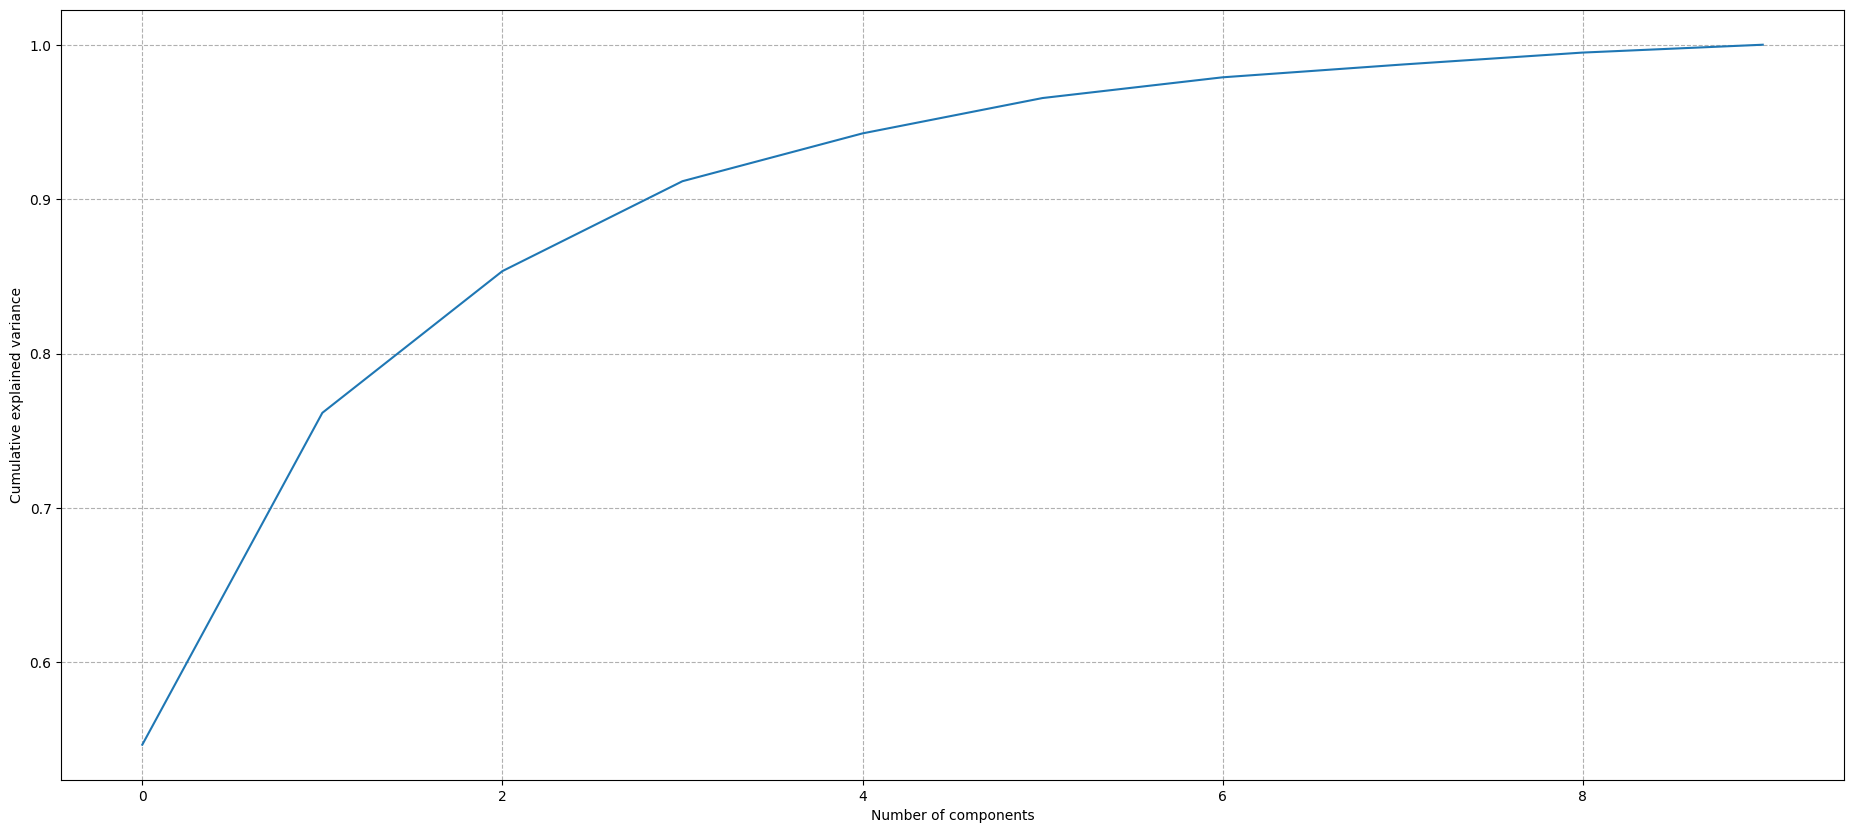

In [24]:
from sklearn.decomposition import PCA

#set up variables
vars = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg']
df_pca = df[vars]

#scale our data
df_pca =(df_pca-df_pca.mean())/df_pca.std()

#get rid of any NaNs using imputation (since PCA can't handle it)
#impute with KNNImputer, as above, using our continuous data
imputer = KNNImputer(n_neighbors=5)
bob = imputer.fit_transform(df_pca)

#replace the data
df_pca[vars] = pd.DataFrame(bob, columns=vars)


pca1 = PCA().fit(df_pca)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True, linestyle = "--")

* Number of Components: 10 components (equal to input variables), as PCA creates orthogonal features up to the number of inputs.

* Variance Explained:
    * PC1: ~0.60 (60% variance, capturing size/power correlations).
    * PC2: ~0.15 (15%, likely fuel efficiency).
    * PC3: ~0.10 (10%, possibly compression or RPM).
    * Cumulative: First 5 components explain ~90% of variance.

* Interpretation: PCA reduced dimensionality effectively, with 3-5 components sufficient for modeling, balancing information retention and simplicity. Components reflect latent factors (e.g., car size, performance, efficiency).* 

<h2><u><b>Conclusion</b></u></h2>

This notebook provides a comprehensive analysis of the UCI Automobile dataset, with thorough EDA and tailored data preparation:
* EDA: Revealed missing values, skewed distributions, and correlations guiding preprocessing.
* Feature Engineering: Addressed missing values (kNN, regression), scaled features (StandardScaler, MinMaxScaler), encoded categoricals, and reduced dimensionality (PCA).
* Next Steps: The prepared dataset is ready for machine learning tasks, such as predicting city-mpg or price, with potential for further transformations (e.g., log for skewness).

<h3><u><b>References</b></u></h3>

* https://www.kaggle.com/code/shubhamsinghgharsele/exploratory-data-analysis-on-automobile-dataset

* https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

* https://stackoverflow.com/questions/64900801/implementing-knn-imputation-on-categorical-variables-in-an-sklearn-pipeline/64907828#64907828


* https://www.kaggle.com/code/kennydevarapalli/automobile-dataset-detailed-analysis


* https://github.com/alicezheng/feature-engineering-book/blob/master/06.01_PCA_on_MNIST_digits.ipynb

